In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
# Check if the CSV file exists
if os.path.exists("btc.csv"):
    # Load data from the CSV file
    data = pd.read_csv("btc.csv")
else:
    # Fetch historical data for the maximum period
    data = btc_ticker.history(period="max")
    # Reset index to ensure 'Date' is a column
    data.reset_index(inplace=True)
    # Save the data to a CSV file
    data.to_csv("btc.csv", index=False)

In [4]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...,...
3536,2024-05-23 00:00:00+00:00,69121.304688,70041.273438,66356.953125,67929.562500,41895680979,0.0,0.0
3537,2024-05-24 00:00:00+00:00,67928.132812,69220.296875,66622.671875,68526.101562,29197308153,0.0,0.0
3538,2024-05-25 00:00:00+00:00,68526.921875,69579.320312,68515.820312,69265.945312,15473071741,0.0,0.0
3539,2024-05-26 00:00:00+00:00,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,0.0,0.0


In [5]:
# Filter data for the specified date range
start_date = '2013-01-01'
end_date = '2024-05-31'
btc = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

In [6]:
# Convert 'publish_date' to datetime and remove the time part
btc['Date'] = pd.to_datetime(btc['Date']).dt.date

#Set 'publish_date' as the index
btc.set_index('Date', inplace=True)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,41895680979
2024-05-24,67928.132812,69220.296875,66622.671875,68526.101562,29197308153
2024-05-25,68526.921875,69579.320312,68515.820312,69265.945312,15473071741


In [9]:
btc.columns = [c.lower() for c in btc.columns]

In [10]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,41895680979
2024-05-24,67928.132812,69220.296875,66622.671875,68526.101562,29197308153
2024-05-25,68526.921875,69579.320312,68515.820312,69265.945312,15473071741


In [11]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3541 entries, 2014-09-17 to 2024-05-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3541 non-null   float64
 1   high    3541 non-null   float64
 2   low     3541 non-null   float64
 3   close   3541 non-null   float64
 4   volume  3541 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 166.0+ KB


In [12]:
btc.describe()

,open,high,low,close,volume
count,3541.000000,3541.000000,3541.000000,3541.000000,3.541000e+03
mean,16385.045454,16766.017017,15978.938035,16403.046867,1.723277e+10
std,18199.122263,18628.922726,17727.869466,18215.964607,1.923946e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,1038.449951,1055.130005,1015.880005,1038.589966,2.271760e+08
50%,8786.107422,8951.005859,8564.900391,8787.786133,1.308600e+10
75%,27210.228516,27646.347656,26766.097656,27219.658203,2.783179e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11


In [13]:
btc.shape

(3541, 5)

In [14]:
btc.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [15]:
redd = pd.read_csv("reddit_sent_score.csv")

In [16]:
# Convert 'publish_date' to datetime and remove the time part
redd['publish_date'] = pd.to_datetime(redd['publish_date']).dt.date

#Set 'publish_date' as the index
redd.set_index('publish_date', inplace=True)

In [17]:
redd

,score,num_of_comments,red_polarity,red_subjectivity,red_compound,red_negative,red_neutral,red_positive
publish_date,,,,,,,,
2013-11-20,3187,832,0.000000,0.000000,0.3612,0.000,0.815,0.185
2013-11-25,3198,282,0.000000,0.000000,0.1531,0.233,0.465,0.302
2014-02-14,3520,763,0.285714,0.535714,0.0000,0.000,1.000,0.000
2014-02-19,3058,495,0.000000,0.000000,0.0000,0.000,1.000,0.000
2014-02-26,3460,1414,-0.028205,0.480769,0.7783,0.072,0.823,0.105
...,...,...,...,...,...,...,...,...
2024-04-13,3118,191,0.000000,0.000000,0.0000,0.000,1.000,0.000
2024-04-18,3623,388,0.000000,0.000000,-0.2263,0.655,0.345,0.000
2024-04-20,3195,305,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [18]:
# Merge the datasets based on index
btc = pd.merge(redd, btc, left_index=True, right_index=True, how='inner')


In [19]:
btc

,score,num_of_comments,red_polarity,red_subjectivity,red_compound,red_negative,red_neutral,red_positive,open,high,low,close,volume
2014-09-26,5212,704,-0.400000,0.700000,0.0000,0.000,1.000,0.000,411.428986,414.937988,400.009003,404.424988,21460800
2014-09-29,3738,157,0.000000,0.000000,0.0000,0.000,1.000,0.000,376.928009,385.210999,372.239990,375.467010,32497700
2014-10-01,5080,509,-0.155556,0.288889,0.0000,0.000,1.000,0.000,387.427002,391.378998,380.779999,383.614990,26229400
2014-10-15,3199,886,0.800000,0.750000,0.4215,0.245,0.319,0.436,400.954987,402.226990,388.765991,394.773010,25267100
2014-11-25,4157,635,0.000000,0.000000,0.0000,0.000,1.000,0.000,376.885986,394.700989,374.783997,375.347992,25442200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-13,3118,191,0.000000,0.000000,0.0000,0.000,1.000,0.000,67188.375000,67931.429688,60919.105469,63821.472656,52869738185
2024-04-18,3623,388,0.000000,0.000000,-0.2263,0.655,0.345,0.000,61275.316406,64125.687500,60833.480469,63512.753906,36006307335
2024-04-20,3195,305,0.000000,0.000000,0.0000,0.000,1.000,0.000,63851.101562,65442.457031,63172.402344,64994.441406,23097485495
2024-04-25,4010,350,0.000000,0.000000,0.0772,0.000,0.794,0.206,64275.019531,65275.207031,62783.632812,64481.707031,32155786816


# Plot the Bitcoin price history

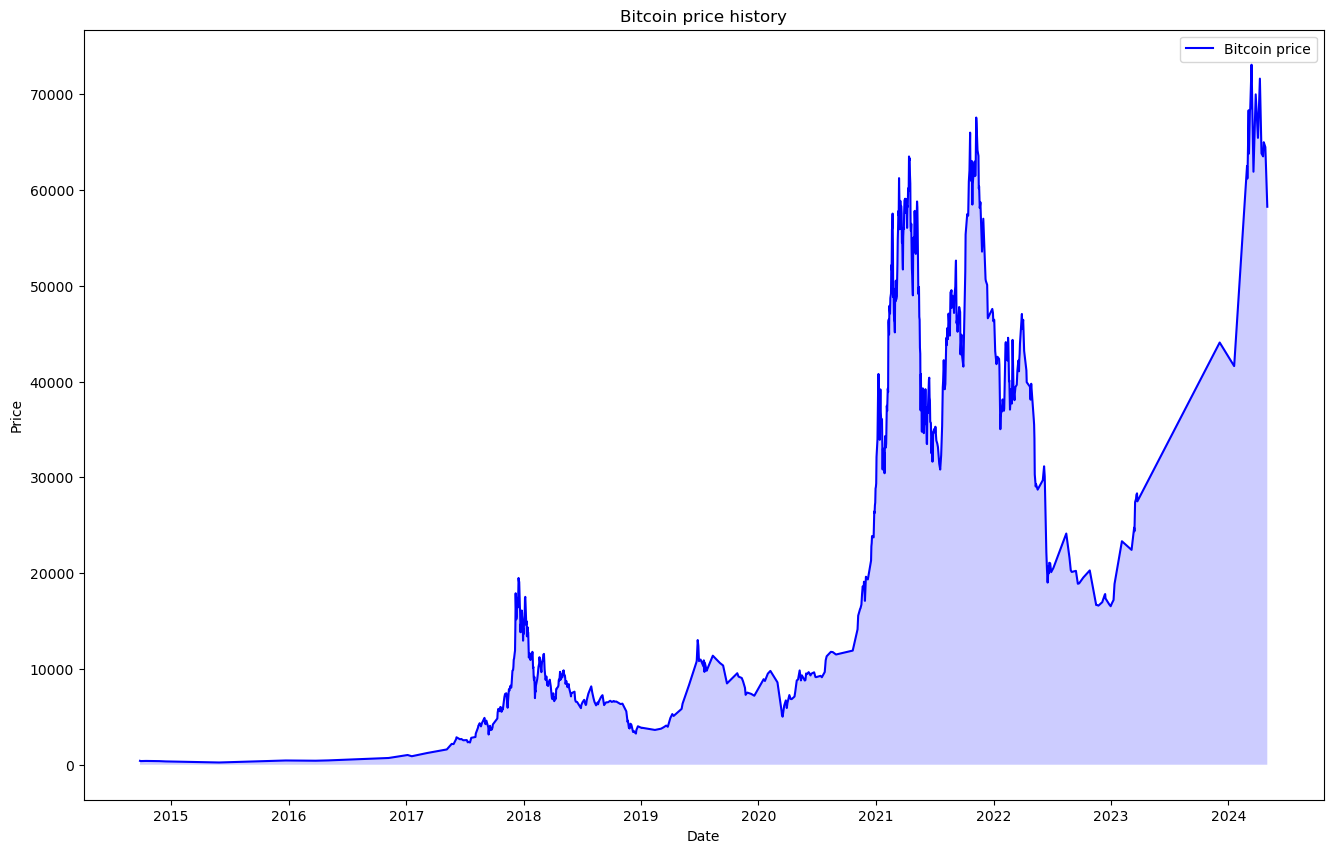

In [20]:
# Plot the btc for date and close columns
# add title "BITCOIN price history"
# color below the line
# add legend
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(btc['close'], color='blue', label='Bitcoin price')
ax.set_title('Bitcoin price history')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
# fill between but start at 0.1 
ax.fill_between(btc.index, btc['close'], 0.1, facecolor='blue', alpha=0.2)
# plt.fill_between(price_data['date_timestamp'], price_data['close'], color='blue', alpha=0.3)
# plt.tight_layout()
plt.show()

# Outlier Analysis

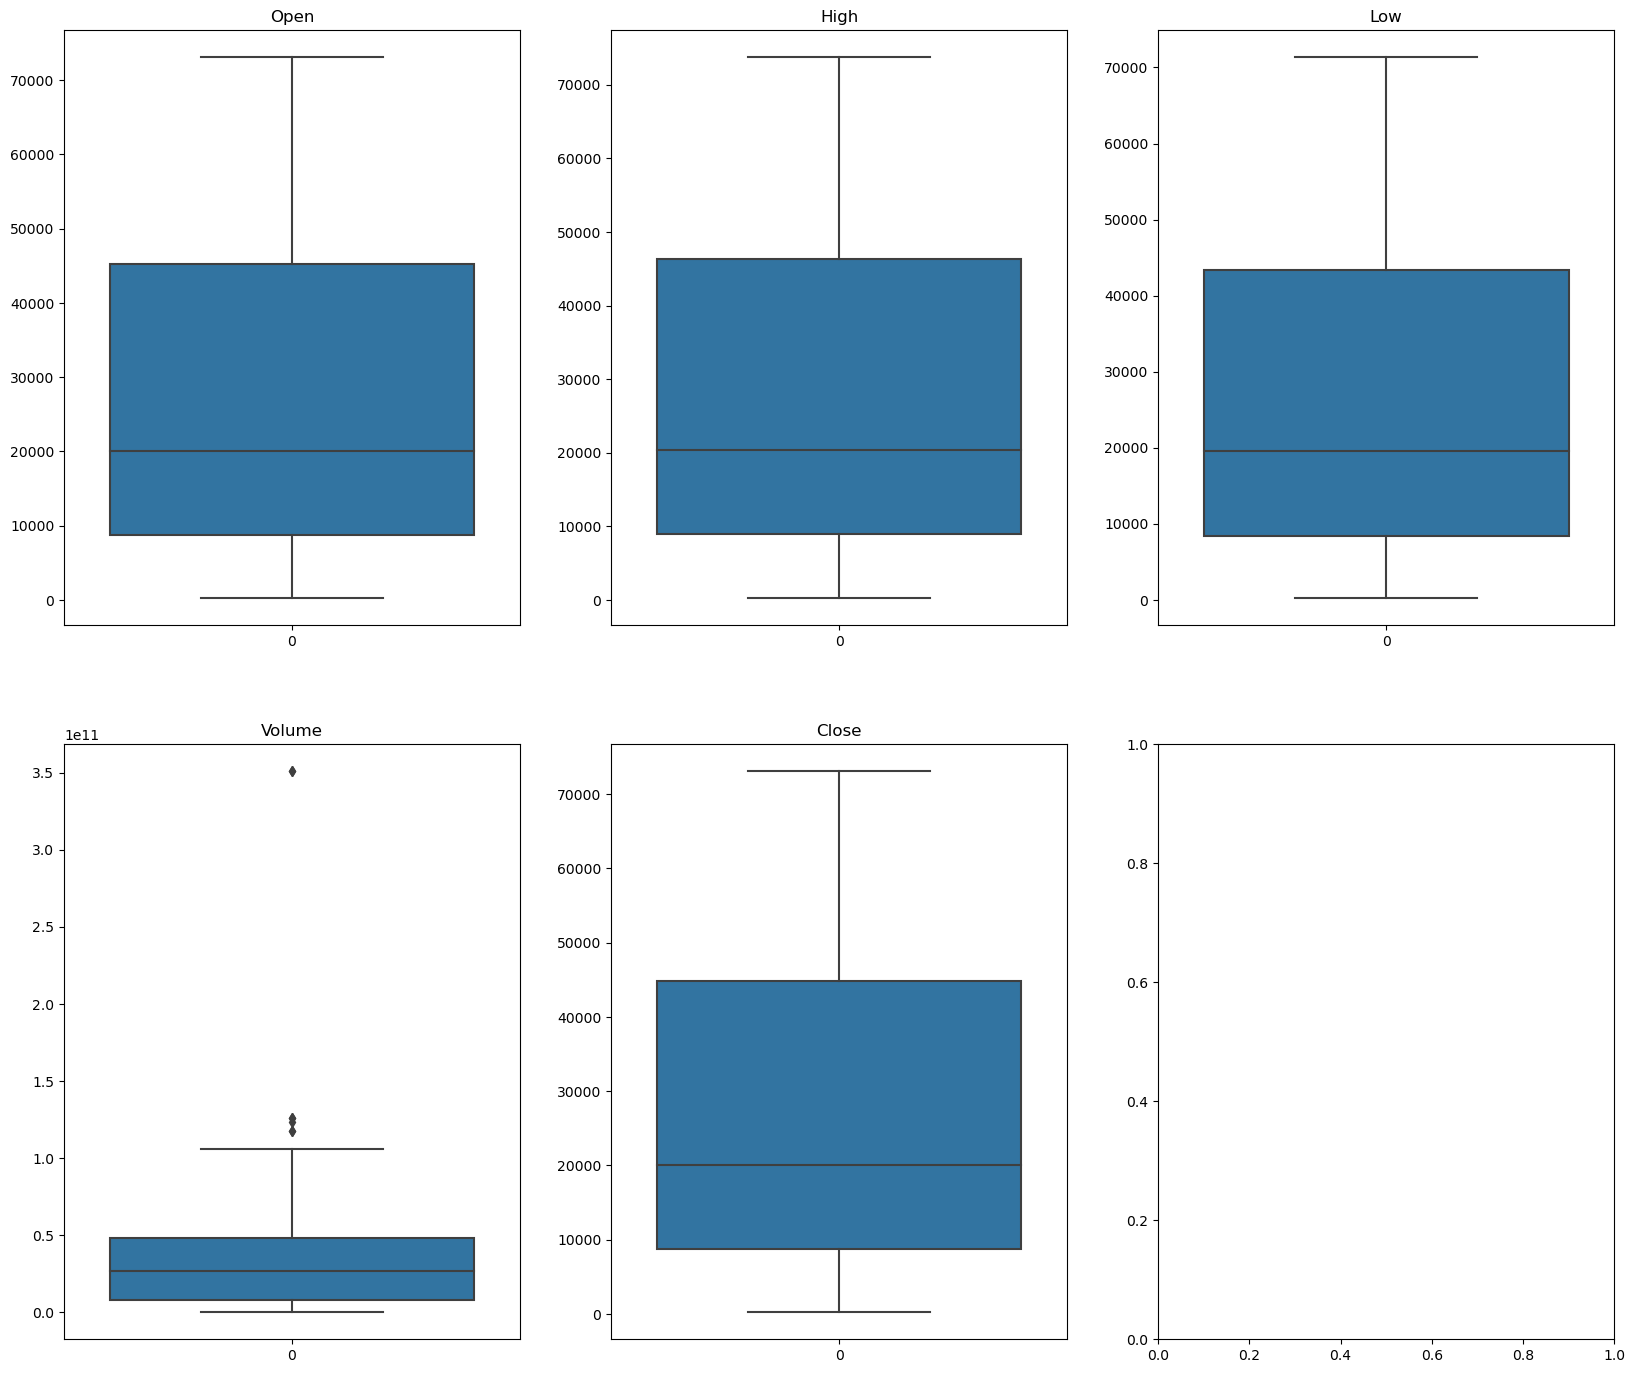

In [21]:
figure, axes = plt.subplots(2, 3, figsize=(20, 17))

ax=sns.boxplot(ax=axes[0,0], data=btc['open'])
ax.set_title('Open')
ax=sns.boxplot(ax=axes[0,1], data=btc['high'])
ax.set_title('High')
ax=sns.boxplot(ax=axes[0,2], data=btc['low'])
ax.set_title('Low')
ax=sns.boxplot(ax=axes[1,0], data=btc['volume'])
ax.set_title('Volume')
ax=sns.boxplot(ax=axes[1,1], data=btc['close'])
ax.set_title('Close')

plt.show()

In [22]:
Quartile1 = np.percentile(btc['volume'], 25, interpolation = 'midpoint')
Quartile3 = np.percentile(btc['volume'], 75, interpolation = 'midpoint')
IQR = Quartile3 - Quartile1

print("Upper bound:",(Quartile3+1.5*IQR))
print("Lower bound:", (Quartile1-1.5*IQR))

print("No. of Outliers:", ((btc['volume'] < (Quartile1 - 1.5 * IQR)) | (btc['volume'] > (Quartile3 + 1.5 * IQR))).sum() )

Upper bound: 109022415064.0
Lower bound: -52977112808.0
No. of Outliers: 7


C:\Users\javed\AppData\Local\Temp\ipykernel_15328\254992836.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Quartile1 = np.percentile(btc['volume'], 25, interpolation = 'midpoint')
C:\Users\javed\AppData\Local\Temp\ipykernel_15328\254992836.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Quartile3 = np.percentile(btc['volume'], 75, interpolation = 'midpoint')


# Comparison
Now that a view of the sentiment of the reddit posted from 2021 to 2023 and the actual highest Bitcoin price.

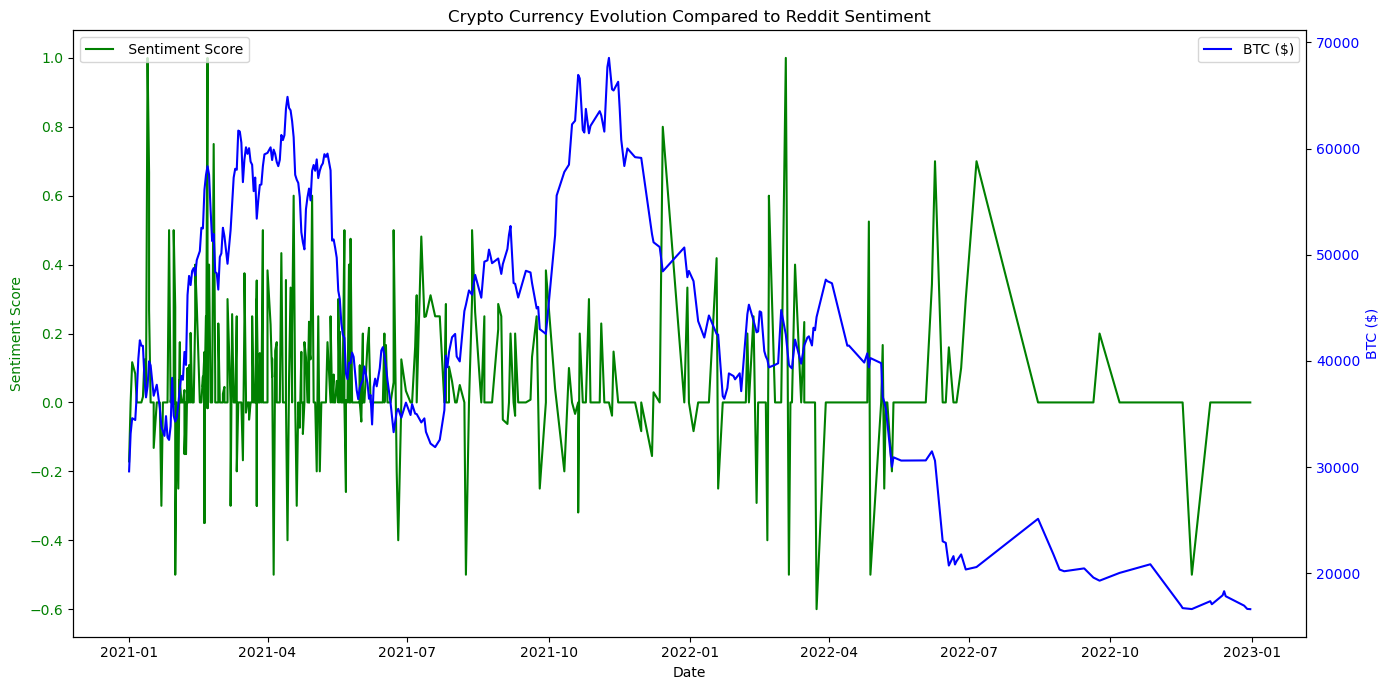

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Make a copy of the original DataFrame to avoid modifying it
btc_copy = btc.copy()

# Ensure the index is a DatetimeIndex
btc_copy.index = pd.to_datetime(btc_copy.index)

# Define the date range and convert to datetime
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-12-31')

# Filter the data to the specified date range
filtered_data = btc_copy.loc[start_date:end_date]

# Creating the plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the Sentiment Score on the primary y-axis
ax1.plot(filtered_data.index, filtered_data['red_polarity'], color='green', label=' Sentiment Score')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Creating a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(filtered_data.index, filtered_data['high'], color='blue', label='BTC ($)')
ax2.set_ylabel('BTC ($)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding the title
plt.title('Crypto Currency Evolution Compared to Reddit Sentiment')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Improving the layout and readability
fig.tight_layout()

# Display the plot
plt.show()


In [24]:
btc.to_csv('bitcoin_score_pre.csv',index=True)

# Cross-Correllation analysis
Applying a correlation on the series (reddit scores and crypto currency) is not enough. That's why we need cross-correlation. The difference is that cross-correlation adds a lag which permit to shift one of the timeseries left or right to find, maybe, a better correlation. This is coherent with our problem as the currency changes come after the tweets' sentiments. So we are fully allowed to operate it.

We can test our correlation hypothesis using the Pandas corr() method, which computes a Pearson correlation coefficient for each column in the dataframe against each other column.

In [25]:
# Define the cross-correlation function. 
# The function takes two arguments, x and y, and returns the correlation coefficient.
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corr(datay.shift(lag), method=method)

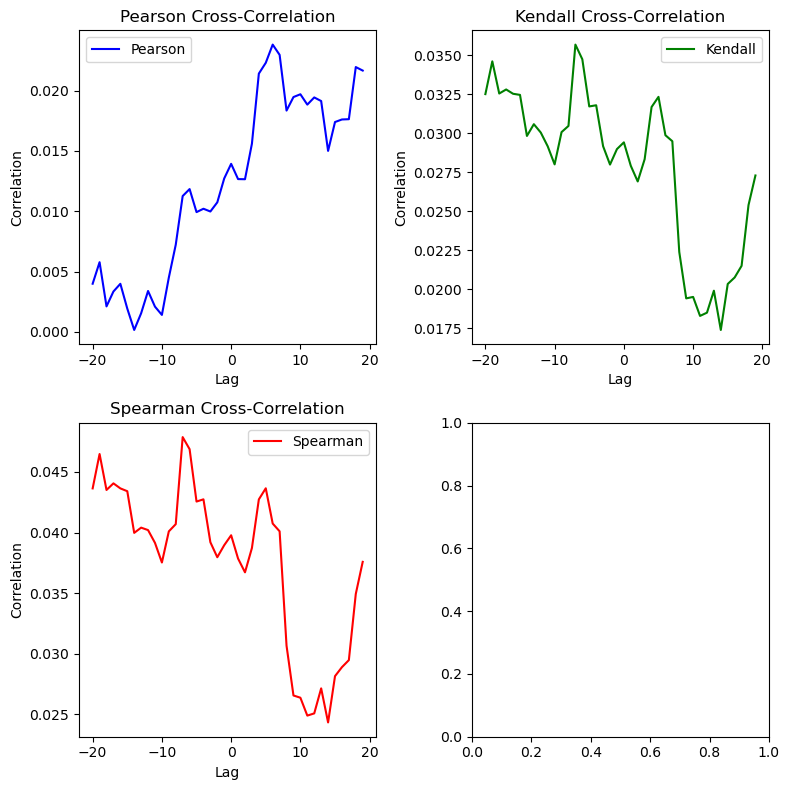

In [26]:
# Define the lag range
lag_range = range(-20, 20)

# Calculate cross-correlation for each lag for different methods
xcov_pearson = [crosscorr(btc_copy['red_polarity'], btc_copy['high'], lag=i, method="pearson") for i in lag_range]
xcov_kendall = [crosscorr(btc_copy['red_polarity'], btc_copy['high'], lag=i, method="kendall") for i in lag_range]
xcov_spearman = [crosscorr(btc_copy['red_polarity'], btc_copy['high'], lag=i, method="spearman") for i in lag_range]

# Creating a figure with three subplots side by side and one below them
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plotting the cross-correlation for Pearson method
axs[0, 0].plot(lag_range, xcov_pearson, label='Pearson', color='blue')
axs[0, 0].set_title('Pearson Cross-Correlation')
axs[0, 0].set_xlabel('Lag')
axs[0, 0].set_ylabel('Correlation')
axs[0, 0].legend()

# Plotting the cross-correlation for Kendall method
axs[0, 1].plot(lag_range, xcov_kendall, label='Kendall', color='green')
axs[0, 1].set_title('Kendall Cross-Correlation')
axs[0, 1].set_xlabel('Lag')
axs[0, 1].set_ylabel('Correlation')
axs[0, 1].legend()

# Plotting the cross-correlation for Spearman method
axs[1, 0].plot(lag_range, xcov_spearman, label='Spearman', color='red')
axs[1, 0].set_title('Spearman Cross-Correlation')
axs[1, 0].set_xlabel('Lag')
axs[1, 0].set_ylabel('Correlation')
axs[1, 0].legend()

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
#Creat a new dataframe with only Close Price
data = btc.filter(['close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

784

Now that we have our close price values in a seprated dataframe we can start normalization our data.

In [28]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00234838],
       [0.00195088],
       [0.00206273],
       [0.00221589],
       [0.00194925],
       [0.0015374 ],
       [0.        ],
       [0.00286967],
       [0.00252343],
       [0.00297815],
       [0.00644866],
       [0.01070739],
       [0.00896735],
       [0.01359222],
       [0.01871465],
       [0.02663076],
       [0.02638917],
       [0.03367824],
       [0.03609951],
       [0.03325367],
       [0.03370968],
       [0.03183391],
       [0.03199328],
       [0.03209321],
       [0.02888731],
       [0.02972533],
       [0.02862773],
       [0.03537089],
       [0.03654824],
       [0.04144898],
       [0.04144898],
       [0.05012158],
       [0.05270977],
       [0.05420147],
       [0.05625719],
       [0.05172803],
       [0.05308396],
       [0.05629824],
       [0.06394859],
       [0.05964881],
       [0.05494793],
       [0.05494793],
       [0.0599007 ],
       [0.05993858],
       [0.05009248],
       [0.04010431],
       [0.04672845],
       [0.046

In [29]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()
     

[array([0.00234838, 0.00195088, 0.00206273, 0.00221589, 0.00194925,
       0.0015374 , 0.        , 0.00286967, 0.00252343, 0.00297815,
       0.00644866, 0.01070739, 0.00896735, 0.01359222, 0.01871465,
       0.02663076, 0.02638917, 0.03367824, 0.03609951, 0.03325367,
       0.03370968, 0.03183391, 0.03199328, 0.03209321, 0.02888731,
       0.02972533, 0.02862773, 0.03537089, 0.03654824, 0.04144898,
       0.04144898, 0.05012158, 0.05270977, 0.05420147, 0.05625719,
       0.05172803, 0.05308396, 0.05629824, 0.06394859, 0.05964881,
       0.05494793, 0.05494793, 0.0599007 , 0.05993858, 0.05009248,
       0.04010431, 0.04672845, 0.04672845, 0.04597842, 0.05259913,
       0.04663483, 0.04735055, 0.04735055, 0.05022646, 0.0544587 ,
       0.06304908, 0.0715656 , 0.0715656 , 0.07431508, 0.07684877])]
[0.07684877318292056]



In [30]:

len(X_train)
     

724

In [31]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train.shape

(724, 60)

In [33]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape
     

(724, 60, 1)

In [34]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])


In [35]:
# Convert the data to a numpy array 
X_test = np.array(X_test)

In [36]:

# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

We are using 2 layers of LSTM and 2 layers of Dense. Our first LSTM layer has return_sequence=True because our first and second layers are LSTM and we have to pass the output of the first layer to the second layer. (Again: LSTM is a Network for Sequential Data)

In [37]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))


In [38]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')
     

In [39]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
724/724 [==============================] - 23s 27ms/step - loss: 0.0044
Epoch 2/10
724/724 [==============================] - 19s 26ms/step - loss: 0.0014
Epoch 3/10
724/724 [==============================] - 19s 26ms/step - loss: 0.0013
Epoch 4/10
724/724 [==============================] - 20s 27ms/step - loss: 9.4185e-04
Epoch 5/10
724/724 [==============================] - 20s 28ms/step - loss: 9.9255e-04
Epoch 6/10
724/724 [==============================] - 20s 27ms/step - loss: 7.8030e-04
Epoch 7/10
724/724 [==============================] - 20s 28ms/step - loss: 6.0926e-04
Epoch 8/10
724/724 [==============================] - 20s 28ms/step - loss: 6.6606e-04
Epoch 9/10
724/724 [==============================] - 21s 29ms/step - loss: 6.0448e-04
Epoch 10/10
724/724 [==============================] - 21s 29ms/step - loss: 5.7765e-04


In [40]:
# Get the model_1 predicted price values 
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

7/7 [==============================] - 1s 12ms/step


196

In [41]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse
     

2718.8881736288267

Text(0.5, 0, 'epochs')

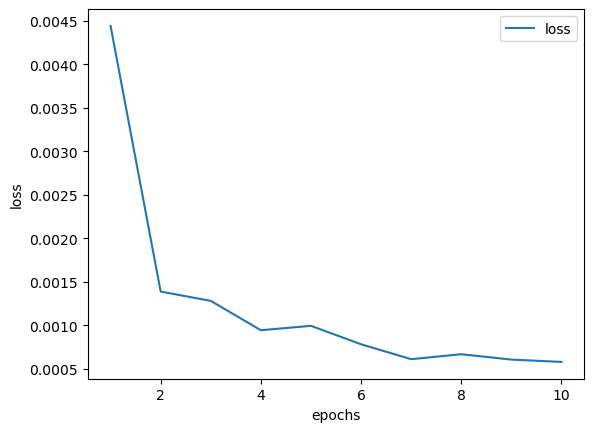

In [42]:

# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

As we can see, on epochs 7 and 10 we have the less loss and best scores. So we can train our model again with 6 epochs to see which one is better fiting.

In [43]:
# Train the model again with 8 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=8)

Epoch 1/8
724/724 [==============================] - 23s 26ms/step - loss: 0.0048
Epoch 2/8
724/724 [==============================] - 20s 27ms/step - loss: 0.0016
Epoch 3/8
724/724 [==============================] - 19s 26ms/step - loss: 0.0013
Epoch 4/8
724/724 [==============================] - 20s 28ms/step - loss: 9.6967e-04
Epoch 5/8
724/724 [==============================] - 20s 28ms/step - loss: 0.0010
Epoch 6/8
724/724 [==============================] - 20s 28ms/step - loss: 7.7772e-04
Epoch 7/8
724/724 [==============================] - 18s 25ms/step - loss: 6.0750e-04
Epoch 8/8
724/724 [==============================] - 20s 28ms/step - loss: 6.6574e-04


In [44]:
# Get the model_2 predicted price values 
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

7/7 [==============================] - 2s 24ms/step


196

In [45]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

448.7108278858418

Now let's see what did our models with predictions and compare our 2 models together:

C:\Users\javed\AppData\Local\Temp\ipykernel_15328\288409067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
C:\Users\javed\AppData\Local\Temp\ipykernel_15328\288409067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


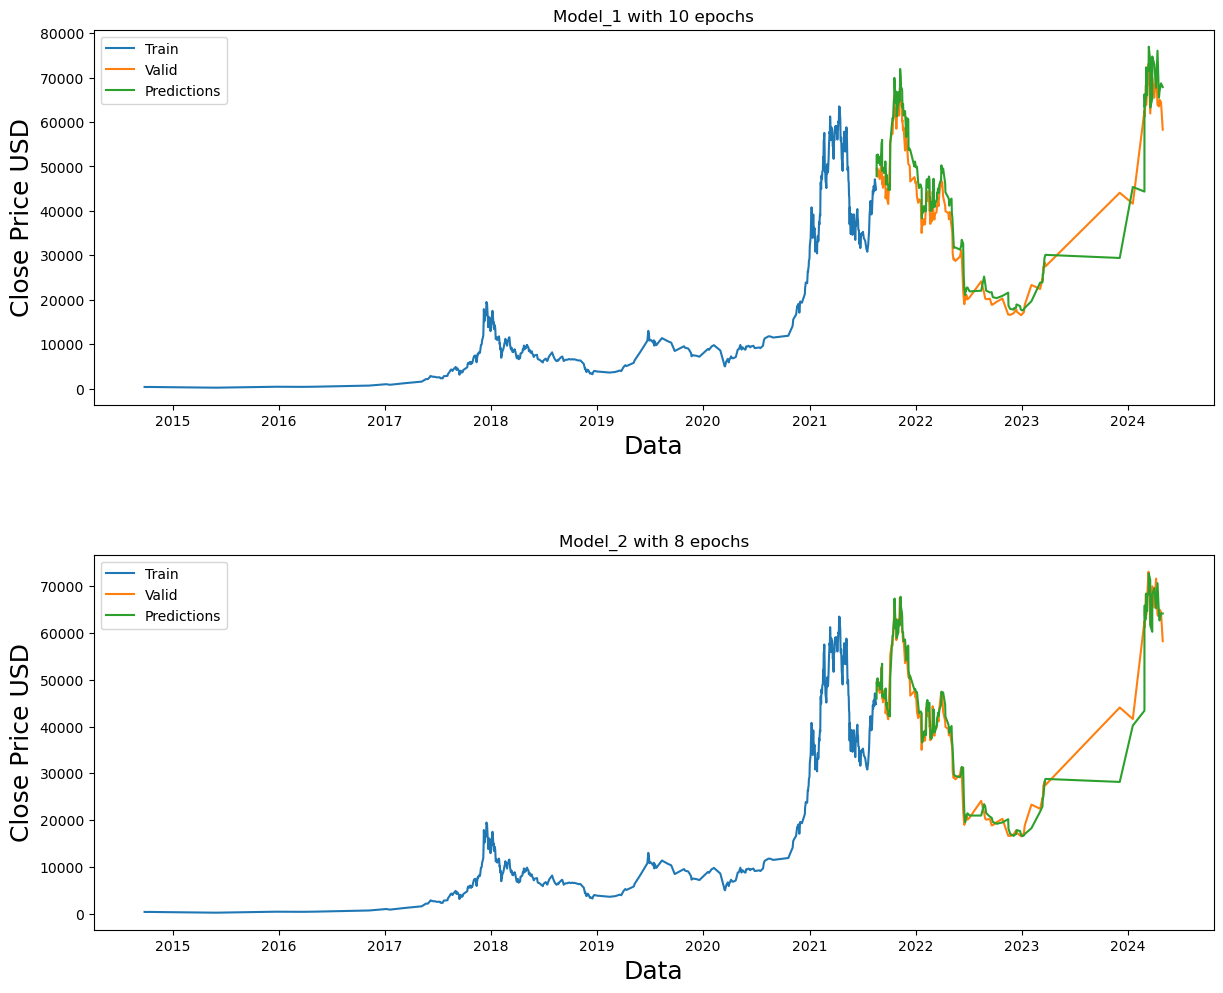

In [46]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data 
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['close'])
plt.plot(valid_1[['close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 8 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['close'])
plt.plot(valid_2[['close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [47]:

#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data 
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
     

1/1 [==============================] - 0s 360ms/step
[[60192.395]]
